In [1]:
import numpy as np
import scipy.fft as sf

from matplotlib import pyplot as plt
params = {
    "legend.fontsize": 14,
    "axes.labelsize": 22,
    "axes.titlesize": 23,
    "xtick.labelsize": 20,
    "ytick.labelsize": 20,
    "figure.figsize": (8, 6),
    "axes.grid": False,
}
plt.rcParams.update(params)

import grand.simu.noise.rf_chain as grfc

freq_MHz = np.arange(30, 251, 1)


Voltage Standing Wave Ration (VSWR)


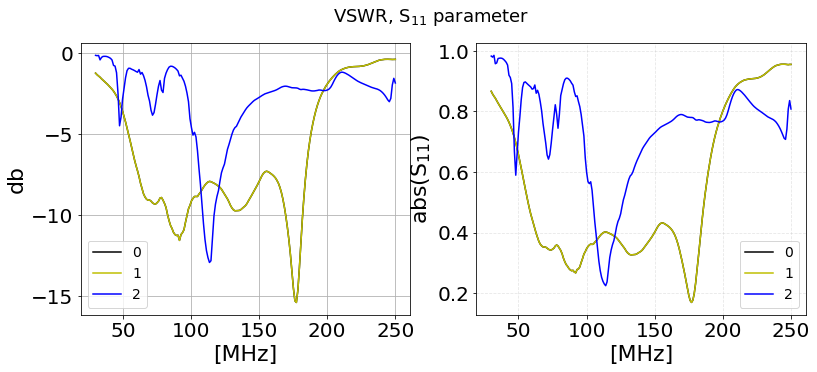

In [2]:
print("Voltage Standing Wave Ration (VSWR)")

vswr = grfc.StandingWaveRatioGP300()
vswr.set_out_freq_mhz(freq_MHz)
vswr.compute_s11()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))
fig.suptitle(r"VSWR, S$_{11}$ parameter", fontsize=18)
#ax1.set_title("db")
ax1.plot(vswr._f_db_s11, vswr._db_s11[0], "k", label="0")
ax1.plot(vswr._f_db_s11, vswr._db_s11[1], "y", label="1")
ax1.plot(vswr._f_db_s11, vswr._db_s11[2], "b", label="2")
ax1.set_ylabel(f"db")
ax1.set_xlabel(f"[MHz]")
ax1.grid()
ax1.legend()
#ax2.set_title("abs(s_11)")
ax2.plot(vswr.freqs_out, np.abs(vswr.s11[:, 0]), "k", label="0")
ax2.plot(vswr.freqs_out, np.abs(vswr.s11[:, 1]), "y", label="1")
ax2.plot(vswr.freqs_out, np.abs(vswr.s11[:, 2]), "b", label="2")
ax2.set_ylabel("abs(S$_{11}$)")
ax2.set_xlabel("[MHz]")
plt.grid(ls='--', alpha=0.3)
ax2.legend()
plt.show()



(3, 440)


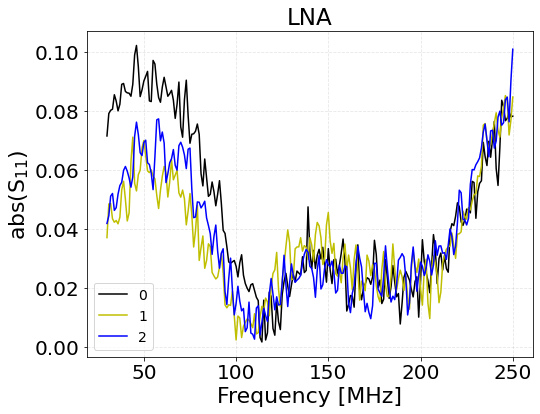

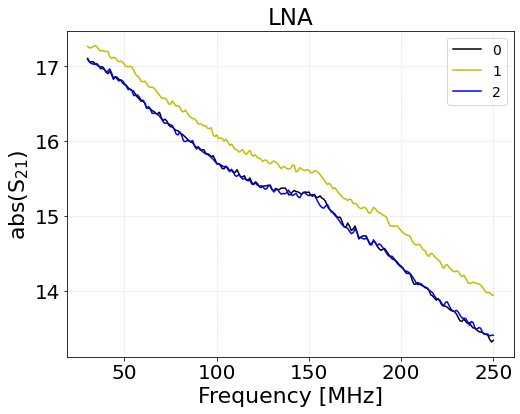

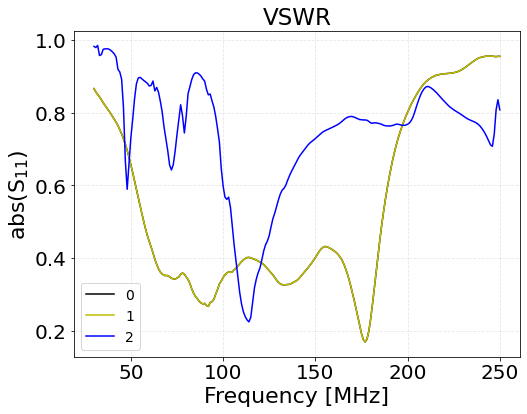

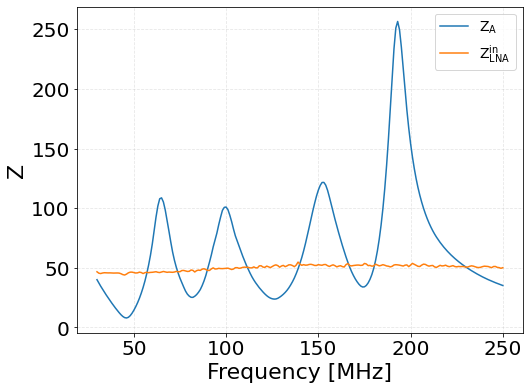

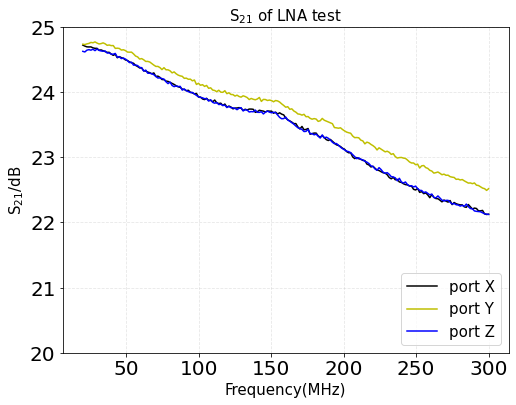

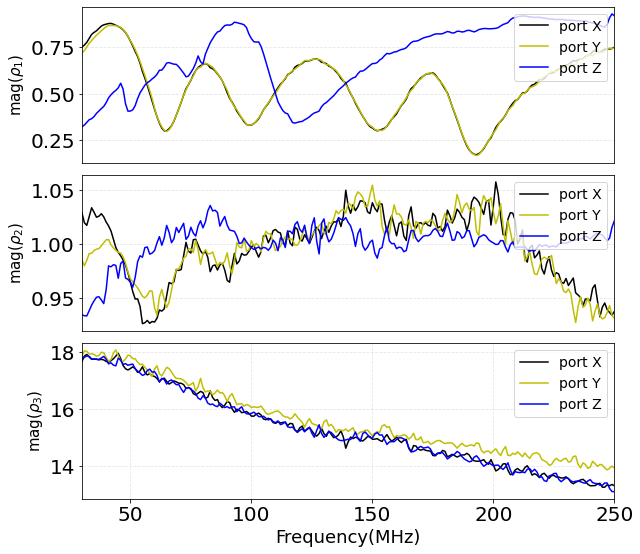

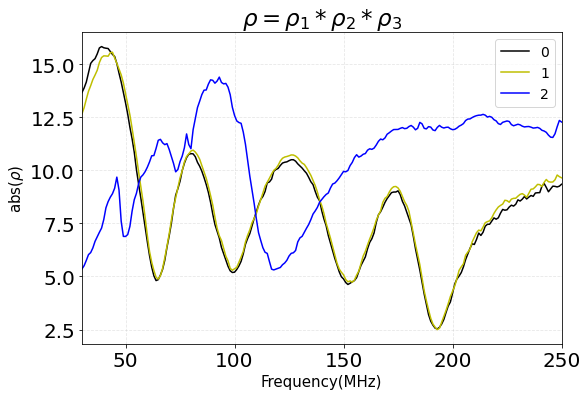

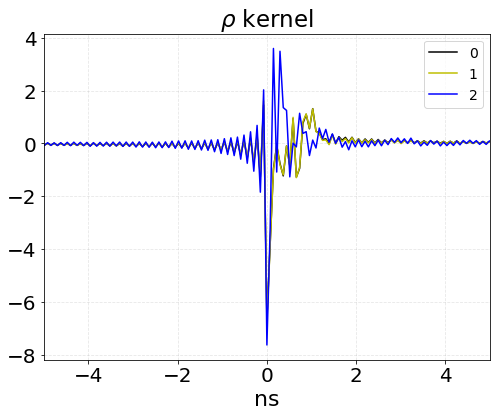

In [3]:
lna = grfc.LowNoiseAmplificatorGP300()
lna.compute_for_freqs(freq_MHz)

"""
plot of LNA S11
"""
plt.figure()
plt.title("LNA")
plt.plot(lna.freqs_out, np.abs(lna.lna_gama[:, 0]), "k", label=r"0")
plt.plot(lna.freqs_out, np.abs(lna.lna_gama[:, 1]), "y", label=r"1")
plt.plot(lna.freqs_out, np.abs(lna.lna_gama[:, 2]), "b", label=r"2")
plt.ylabel(r"abs(S$_{11}$)")
plt.xlabel(f"Frequency [MHz]")
plt.grid(ls='--', alpha=0.3)
plt.legend()
#plt.savefig("lna_s11.png", bbox_inches="tight")

"""
plot of LNA S21
"""
plt.figure()
plt.title("LNA")
plt.plot(lna.freqs_out, np.abs(lna.lna_s21[:, 0]), "k", label=r"0")
plt.plot(lna.freqs_out, np.abs(lna.lna_s21[:, 1]), "y", label=r"1")
plt.plot(lna.freqs_out, np.abs(lna.lna_s21[:, 2]), "b", label=r"2")
plt.ylabel(r"abs(S$_{21}$)")
plt.xlabel(f"Frequency [MHz]")
plt.grid(ls='--', alpha=0.3)
plt.legend()
plt.savefig("lna_s21.png", bbox_inches="tight")

"""
plot of intermediate calculation gamma
"""
plt.figure()
plt.title(r"VSWR")
plt.plot(lna.freqs_out, np.abs(lna.antenna_gama[:, 0]), "k", label=r"0")
plt.plot(lna.freqs_out, np.abs(lna.antenna_gama[:, 1]), "y", label=r"1")
plt.plot(lna.freqs_out, np.abs(lna.antenna_gama[:, 2]), "b", label=r"2")
plt.grid(ls='--', alpha=0.3)
plt.legend()
plt.xlabel(f"Frequency [MHz]")
plt.ylabel(r"abs(S$_{11}$)")

"""
plot of intermediate calculation z
"""
plt.figure()
plt.title("")
plt.plot(lna.freqs_out, np.abs(lna.z_ant[:, 0]), label=r"$\mathregular{Z_{A}}$")
plt.plot(lna.freqs_out, np.abs(lna.z_in_lna[:, 0]), label=r"$\mathregular{Z^{in}_{LNA}}$")
plt.grid(ls='--', alpha=0.3)
plt.legend()
plt.xlabel(f"Frequency [MHz]")
plt.ylabel(f"Z")

"""
plot of FFT LNA transfer function rho=rho_1*rho_2*rho_3
"""
l_col = ["k", "y", "b"]

plt.figure()
# plt.rcParams["font.sans-serif"] = ["Times New Roman"]
for port in range(3):
    plt.plot(lna.freqs_in, lna._dbs21_a[port], l_col[port])
plt.ylim(20, 25)
plt.xlabel("Frequency(MHz)", fontsize=15)
plt.ylabel(r"$\mathregular{S_{21}/dB} $", fontsize=15)
plt.legend(["port X", "port Y", "port Z"], loc="lower right", fontsize=15)
plt.title(r"$\mathregular{S_{21}}$" + " of LNA test", fontsize=15)
plt.grid(ls='--', alpha=0.3)

plt.figure(figsize=(9, 9))
# plt.rcParams["font.sans-serif"] = ["Times New Roman"]
plt.subplot(3, 1, 1)
for port in range(3):
    plt.plot(lna.freqs_out, np.abs(lna._rho1[:, port]), l_col[port])
plt.legend(["port X", "port Y", "port Z"], loc="upper right")
plt.ylabel(r"mag($\rho_1$)", fontsize=15)
plt.xlim(30, 250)
plt.grid(ls='--', alpha=0.3)
plt.xticks([])
plt.subplot(3, 1, 2)
for port in range(3):
    plt.plot(lna.freqs_out, np.abs(lna._rho2[:, port]), l_col[port])
plt.legend(["port X", "port Y", "port Z"], loc="upper right")
plt.ylabel(r"mag($\rho_2$)", fontsize=15)
plt.xlim(30, 250)
plt.grid(ls='--', alpha=0.3)
plt.xticks([])
plt.subplot(3, 1, 3)
for port in range(3):
    plt.plot(lna.freqs_out, np.abs(lna._rho3[:, port]), l_col[port])
plt.legend(["port X", "port Y", "port Z"], loc="upper right")
plt.xlabel("Frequency(MHz)", fontsize=18)
plt.ylabel(r"mag($\rho_3$)", fontsize=15)
plt.xlim(30, 250)
plt.grid(ls='--', alpha=0.3)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
#plt.savefig("lna_rho1_2_3.png", bbox_inches="tight")

"""
plot of LNA transfer function in time space
"""
plt.figure()
for port in range(3):
    plt.plot(lna.freqs_out, np.abs(lna.rho123[:, port]), color=l_col[port])
plt.legend(["0", "1", "2"], loc="upper right")
plt.xlabel("Frequency(MHz)", fontsize=15)
plt.ylabel(r"abs($\rho$)", fontsize=15)
plt.xlim(30, 250)
plt.title(r"$\rho=\rho_1*\rho_2*\rho_3$")
plt.grid(ls='--', alpha=0.3)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
#plt.savefig("lna_rho.png", bbox_inches="tight")


"""
plot of LNA transfer function in time space
"""
plt.figure()
plt.title(r"$\rho$ kernel")
kernel_rho = sf.fftshift(sf.irfft(lna.get_fft_rho_3d()), axes=1)
# kernel_rho = sf.irfft(self.get_fft_rho_3d())
print(kernel_rho.shape)
# TODO: self.size_sig//2 or self.size_sig//2 -1 ?
v_time = np.arange(lna.size_sig, dtype=np.float64) - lna.size_sig // 2
dt_ns = 1e9 / (lna.freqs_out[1] * lna.size_sig * 1e6)
v_time_ns = dt_ns * v_time
plt.plot(v_time_ns, kernel_rho[0], "k", label="0")
plt.plot(v_time_ns, kernel_rho[1], "y", label="1")
plt.plot(v_time_ns, kernel_rho[2], "b", label="2")
plt.xlabel("ns")
plt.grid(ls='--', alpha=0.3)
plt.legend()
plt.xlim(-5,5)
plt.show()


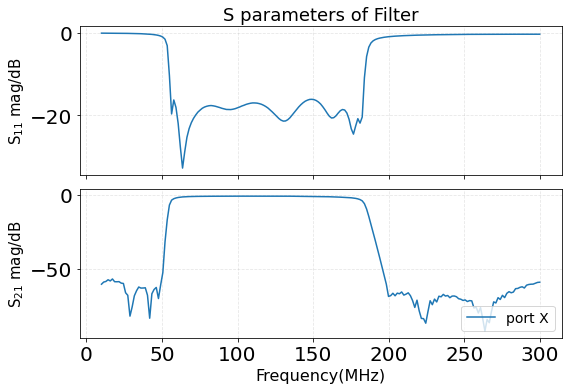

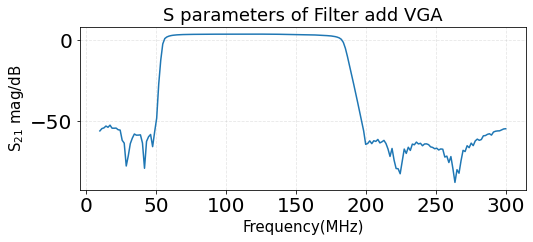

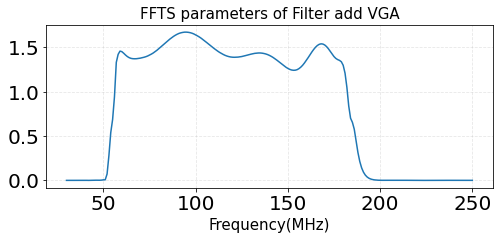

In [4]:
vga = grfc.VgaFilterBalunGP300()
vga.compute_for_freqs(freq_MHz)

plt.figure()
# plt.rcParams["font.sans-serif"] = ["Times New Roman"]
# S11 and S21 DB
plt.subplot(2, 1, 1)
plt.plot(vga.freqs_in, vga.dbs11)
plt.ylabel(r"S$_{11}$ mag/dB", fontsize=15)
plt.grid(ls='--', alpha=0.3)
ax = plt.gca()
ax.set_xticklabels([])
plt.title("S parameters of Filter", fontsize=18)
plt.subplot(2, 1, 2)
plt.plot(vga.freqs_in, vga.dbs21)
plt.grid(ls='--', alpha=0.3)
plt.xlabel("Frequency(MHz)", fontsize=16)
plt.ylabel(r"S$_{21}$ mag/dB", fontsize=15)
plt.legend(["port X", "port Y", "port Z"], loc="lower right")
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# s21_add_vga
plt.figure(figsize=(8,3))
plt.plot(vga.freqs_in, vga.dbs21_add_vga)
plt.xlabel("Frequency(MHz)", fontsize=15)
plt.ylabel(r"S$_{21}$ mag/dB", fontsize=15)
plt.title("S parameters of Filter add VGA", fontsize=18)
plt.grid(ls='--', alpha=0.3)

plt.figure(figsize=(8,3))
plt.title("FFTS parameters of Filter add VGA", fontsize=15)
plt.plot(vga.freqs_out, np.abs(vga.fft_vgafilbal))
plt.xlabel("Frequency(MHz)", fontsize=15)
plt.grid(ls='--', alpha=0.3)
plt.show()


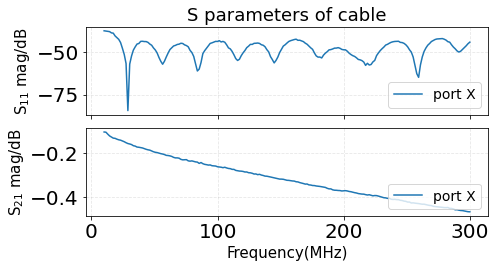

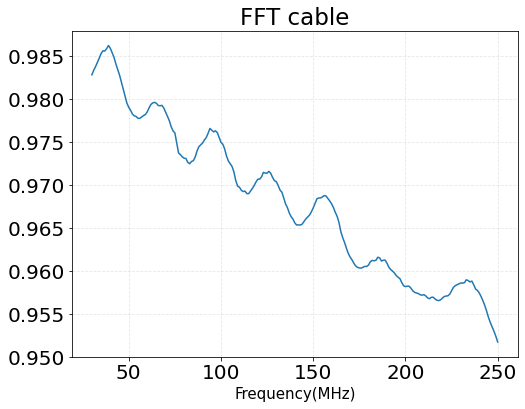

In [5]:
cable  = grfc.CableGP300()
cable.compute_for_freqs(freq_MHz)

plt.figure(figsize=(7, 4))
# plt.rcParams["font.sans-serif"] = ["Times New Roman"]
plt.subplot(2, 1, 1)
plt.plot(cable.freqs_in, cable.dbs11)
plt.ylabel(r"S$_{11}$ mag/dB", fontsize=15)
plt.legend(["port X", "port Y", "port Z"], loc="lower right")
plt.grid(ls='--', alpha=0.3)
ax = plt.gca()
ax.set_xticklabels([])
plt.title("S parameters of cable", fontsize=18)
plt.subplot(2, 1, 2)
plt.plot(cable.freqs_in, cable.dbs21)
#plt.ylim(-10, 0)
plt.xlabel("Frequency(MHz)", fontsize=15)
plt.ylabel(r"S$_{21}$ mag/dB", fontsize=15)
plt.legend(["port X", "port Y", "port Z"], loc="lower right")
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.grid(ls='--', alpha=0.3)

plt.figure()
plt.title("FFT cable")
plt.plot(cable.freqs_out, np.abs(cable.fft_cable))
plt.xlabel("Frequency(MHz)", fontsize=15)
plt.grid(ls='--', alpha=0.3)
plt.show()


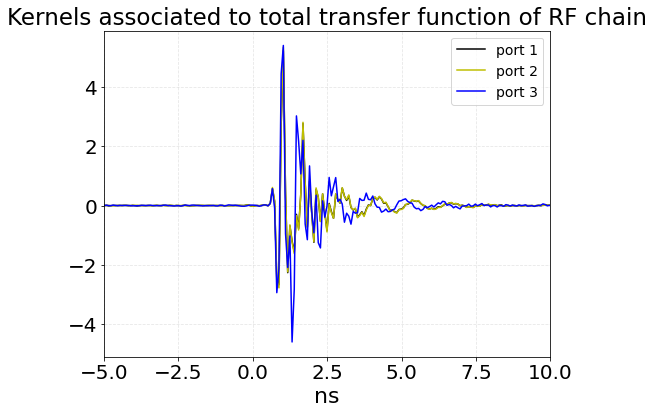

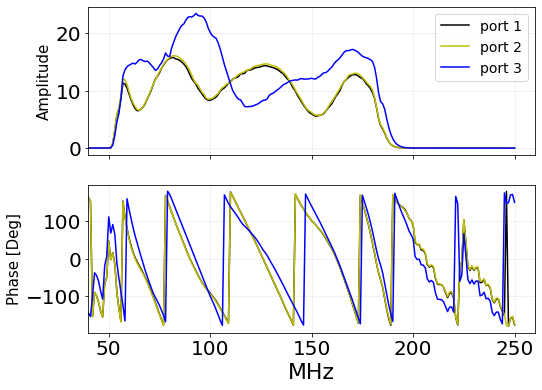

In [6]:
rfchain= grfc.RfChainGP300()
rfchain.compute_for_freqs(freq_MHz)

plt.figure()
plt.title("Kernels associated to total transfer function of RF chain")
kernel_0 = sf.fftshift(sf.irfft(rfchain.get_tf_3d()[0, :]))
kernel_1 = sf.fftshift(sf.irfft(rfchain.get_tf_3d()[1, :]))
kernel_2 = sf.fftshift(sf.irfft(rfchain.get_tf_3d()[2, :]))
# kernel = sf.irfft(self.get_fft_rho_3d())
# TODO: self.size_sig//2 or self.size_sig//2 -1 ?
v_time = np.arange(rfchain.lna.size_sig, dtype=np.float64) - rfchain.lna.size_sig // 2
dt_ns = 1e9 / (rfchain.lna.freqs_out[1] * rfchain.lna.size_sig * 1e6)
v_time_ns = dt_ns * v_time
plt.plot(v_time_ns, kernel_0, "k", label="port 1")
plt.plot(v_time_ns, kernel_1, "y", label="port 2")
plt.plot(v_time_ns, kernel_2, "b", label="port 3")
plt.xlabel("ns")
plt.grid(ls='--', alpha=0.3)
plt.legend()
plt.xlim(-5,10)

freqs = rfchain.lna.freqs_out
plt.figure()
plt.subplot(2, 1, 1)
plt.xlim(40, 260)
#plt.title("Amplitude total transfer function")
plt.plot(freqs, np.abs(rfchain._total_tf[0]), "k", label="port 1")
plt.plot(freqs, np.abs(rfchain._total_tf[1]), "y", label="port 2")
plt.plot(freqs, np.abs(rfchain._total_tf[2]), "b", label="port 3")
plt.ylabel('Amplitude', fontsize=15)
plt.grid(ls='--', alpha=0.3)
plt.legend()
ax = plt.gca()
ax.set_xticklabels([])
plt.subplot(2, 1, 2)
plt.xlim(40, 260)
plt.plot(freqs, np.angle(rfchain._total_tf[0], deg=True), "k", label="port 1")
plt.plot(freqs, np.angle(rfchain._total_tf[1], deg=True), "y", label="port 2")
plt.plot(freqs, np.angle(rfchain._total_tf[2], deg=True), "b", label="port 3")
plt.xlabel("MHz")
plt.ylabel("Phase [Deg]", fontsize=15)
plt.grid(ls='--', alpha=0.3)
plt.show()
